# Typical steps to follow while building a supervised machine learning model on a given dataset:
    o Partition the labeled dataset into two random portions – 80% to Train the model and 20% to Test the model.
    o Fit the desired supervised machine learning model on the Train set to predict response using the predictors.
    o Predict response using the predictors on the Test set using the machine learning model fit on the Train data.
    o Check the Goodness of Fit of the model on Train set using R^2 and Prediction Accuracy on Test set using MSE.

In [79]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

**Import Dataset**

In [80]:
house_data = pd.read_csv("train.csv")
house_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [81]:
print("Data type : ", type(house_data))
print("Data dims : ", house_data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1460, 81)


In [82]:
print(house_data.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


# Problem 1 : Predicting SalePrice using GrLivArea
Note : We observed during EDA that GrLivArea and SalePrice have a strong linear relationship with correlation 0.71.
In this problem, you will build a Linear Regression model to predict SalePrice using GrLivArea and judge its accuracy.

**a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train
set to predict SalePrice using GrLivArea. Print the coefficients of your model and plot the regression line.**

Response Variable : **SalePrice**     
Predictor Feature : **GrLivArea**    

> Regression Model : SalePrice = $a$ $\times$ GrLivArea + $b$  

In [83]:
SP = pd.DataFrame(house_data['SalePrice'])        # Response
GLA = pd.DataFrame(house_data['GrLivArea'])       # Predictor

In [84]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the Dataset into Train and Test randomly
X_train, X_test, y_train, y_test = train_test_split(GLA, SP, test_size = 0.20)

In [85]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

Intercept of Regression 	: b =  [10047.3347508]
Coefficients of Regression 	: a =  [[113.58905502]]



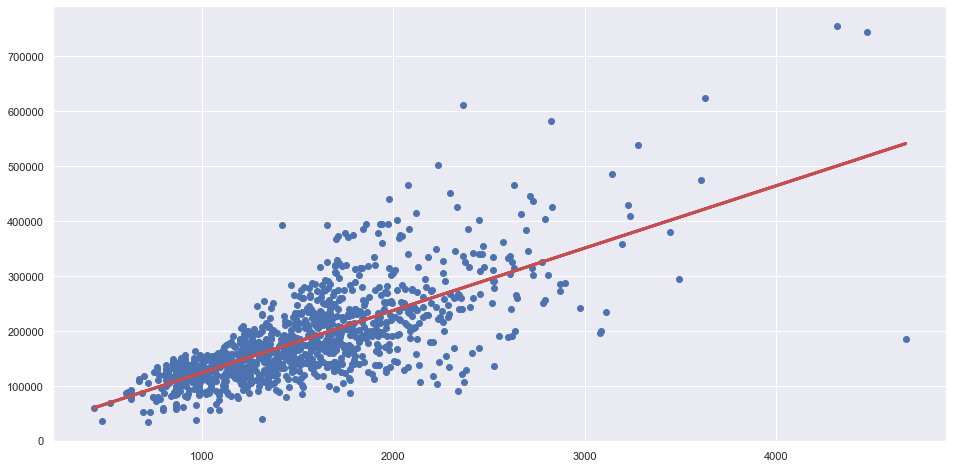

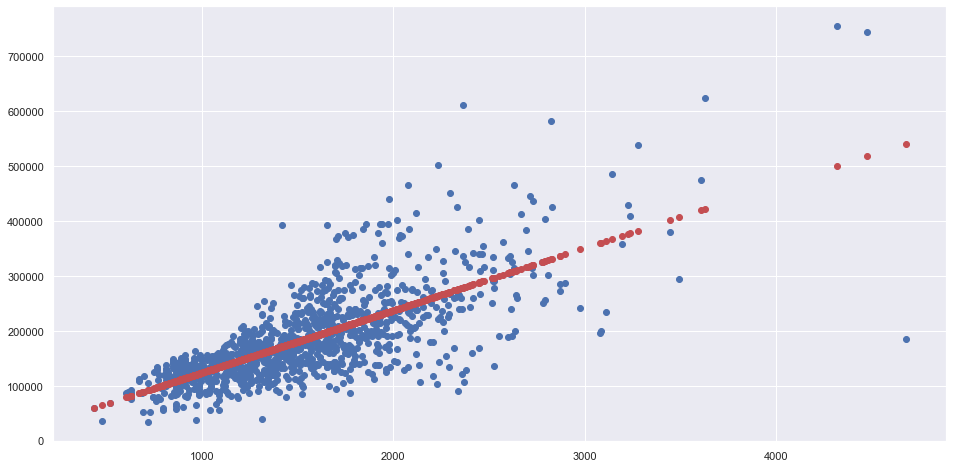

In [87]:
# Predict Total values corresponding to GLA
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)


# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred, color = "r")
plt.show()



**b) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set.
Print the metrics for Goodness of Fit and Prediction Accuracy that you think are appropriate in each scenario.**

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5302858548399354
Mean Squared Error (MSE) 	: 3066258006.272552
Root Mean Squared Error (RMSE) 	: 55373.80252675946

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3499253211257648
Mean Squared Error (MSE) 	: 3499754646.034067
Root Mean Squared Error (RMSE) 	: 59158.72417517189



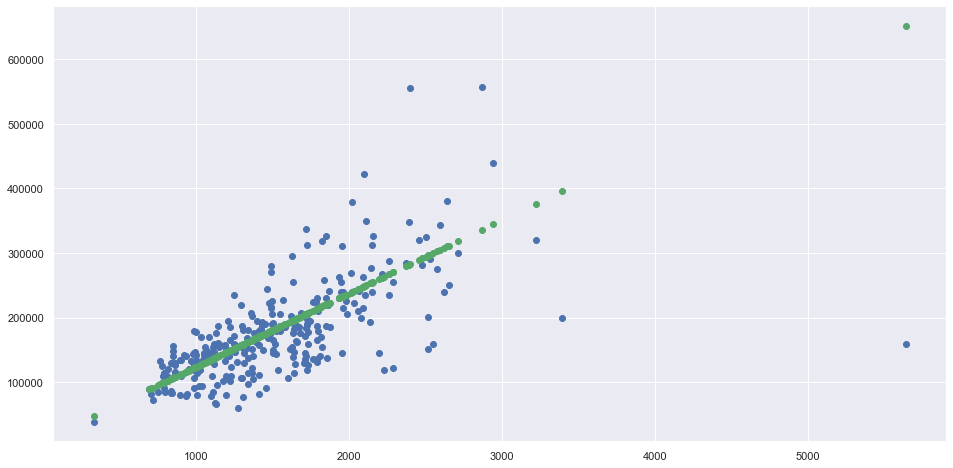

In [88]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
mse1 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse1)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse1))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
mse2 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse2)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse2))
print()

# Plot the Linear Regression line for test dataset
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_pred, color = "g")
plt.show()

# Problem 2 : Predicting SalePrice using Other Variables

Following the steps from the previous problem, build two new uni-variate Linear Regression models to predict SalePrice
using the variables TotalBsmtSF and GarageArea, individually. Justify which of the three models is the best in this case.

## TotalBsmtSF

Intercept of Regression 	: b =  [66166.15493166]
Coefficients of Regression 	: a =  [[108.32920779]]



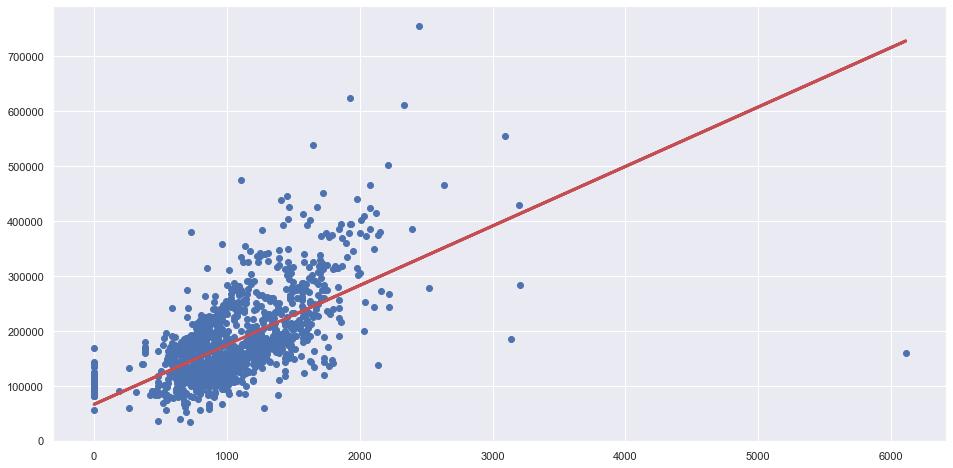

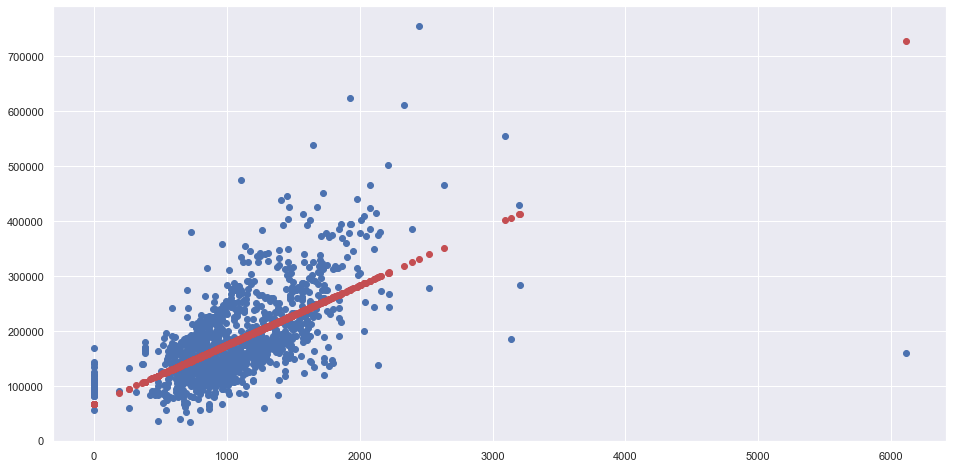

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3804625779488491
Mean Squared Error (MSE) 	: 3890033801.5834928
Root Mean Squared Error (RMSE) 	: 62370.13549434932

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.35782613733841573
Mean Squared Error (MSE) 	: 4109517762.013345
Root Mean Squared Error (RMSE) 	: 64105.52052681067



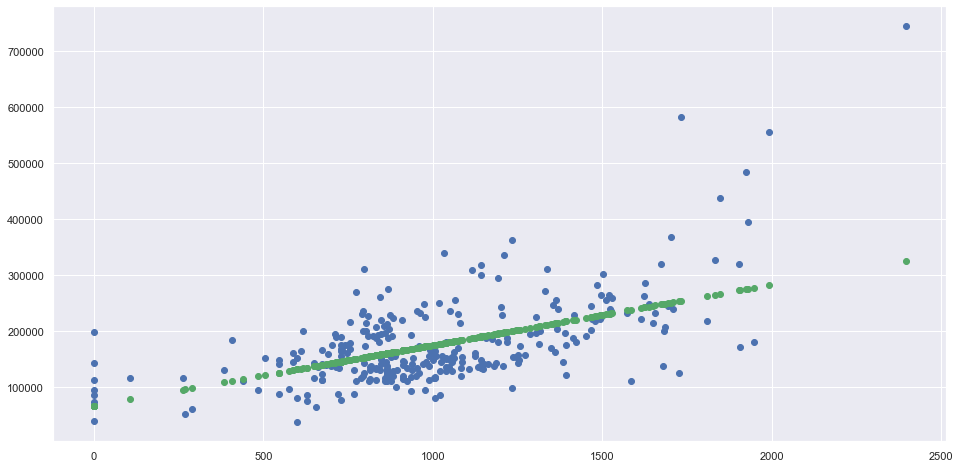

In [89]:
# Recall the Total-HP Dataset
SP = pd.DataFrame(house_data['SalePrice'])   # Response
TBSF = pd.DataFrame(house_data['TotalBsmtSF'])         # Predictor

# Split the Dataset into Train and Test randomly
X_train, X_test, y_train, y_test = train_test_split(TBSF, SP, test_size = 0.2)    #200 test, 600 train
# train_test_split(x,y,fraction of elements wanted in test set)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred, color = "r")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
mse1 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse1)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse1))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
mse2 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse2)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse2))
print()

# Plot the Linear Regression line for test dataset
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_pred, color = "g")
plt.show()

### GarageArea

Intercept of Regression 	: b =  [70330.28582318]
Coefficients of Regression 	: a =  [[233.53986226]]



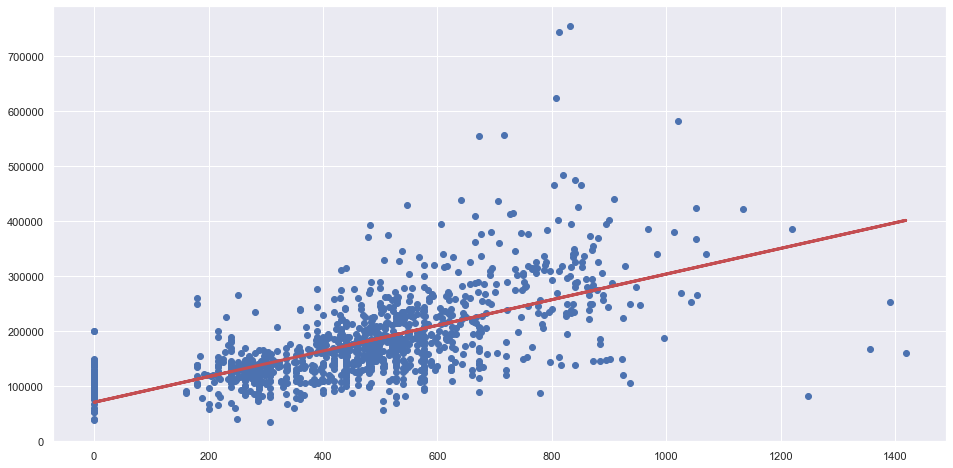

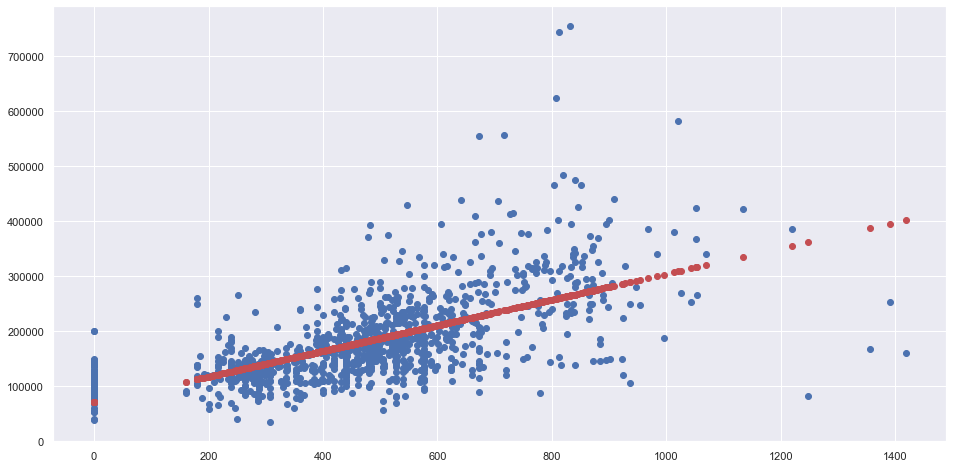

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3934045982072154
Mean Squared Error (MSE) 	: 3866427903.9351773
Root Mean Squared Error (RMSE) 	: 62180.607137074316

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3685093613798226
Mean Squared Error (MSE) 	: 3812941534.1319537
Root Mean Squared Error (RMSE) 	: 61749.02051151867



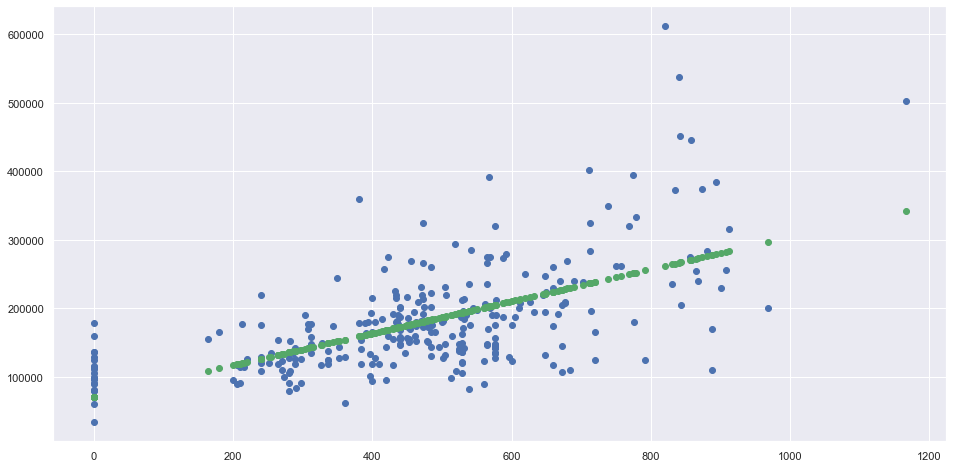

In [90]:
# Recall the Total-HP Dataset
SP = pd.DataFrame(house_data['SalePrice'])   # Response
TBSF = pd.DataFrame(house_data['GarageArea'])         # Predictor

# Split the Dataset into Train and Test randomly
X_train, X_test, y_train, y_test = train_test_split(TBSF, SP, test_size = 0.2)    #200 test, 600 train
# train_test_split(x,y,fraction of elements wanted in test set)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred, color = "r")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
mse1 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse1)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse1))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
mse2 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse2)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse2))
print()

# Plot the Linear Regression line for test dataset
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_pred, color = "g")
plt.show()

In [37]:
house_data1 = house_data[['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']]
print(house_data1.corr())

             GrLivArea  TotalBsmtSF  GarageArea  SalePrice
GrLivArea     1.000000     0.454868    0.468997   0.708624
TotalBsmtSF   0.454868     1.000000    0.486665   0.613581
GarageArea    0.468997     0.486665    1.000000   0.623431
SalePrice     0.708624     0.613581    0.623431   1.000000


## Summary of Metrics

### GrLivArea

### TotalBsmtSF

### GarageArea

GRrLivArea has the highest Explained Variance and strongest correlation with SalePrice. It also has the lowest Root Mean Squared Error.

# Problem 3 : Refining the Models to Predict SalePrice
In this problem, you will consider finer details of the dataset and the variables to refine the model to predict SalePrice.


In [93]:
house_data = pd.read_csv("train.csv")
house_data.shape

(1460, 81)

(a) Find the houses (rows) that are “outliers” for GrLivArea and/or SalePrice. This means outliers for GrLivArea
UNION outliers for SalePrice in a set notation. Remove all these “outliers” from the dataset so that it is clean.
    
    o In Part (a), there are houses that are outliers on both variables (intersection), but we really want the “union”.

In [94]:
#remove outliers for GrLivArea
df = house_data['GrLivArea']
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
house_data_fil = house_data[house_data['GrLivArea'] >= (Q1 - 1.5 * IQR)]
house_data_fil = house_data[house_data['GrLivArea'] <= (Q3 + 1.5 * IQR)]

#remove outliers for SalePrice
df = house_data['SalePrice']
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
house_data_fil = house_data_fil[house_data_fil['SalePrice'] >= (Q1 - 1.5 * IQR)]
house_data_fil = house_data_fil[house_data_fil['SalePrice'] <= (Q3 + 1.5 * IQR)]

house_data_fil.shape


#note: this block cannot be ran multiple times on its own as the mean and IQR values will keep changing

(1383, 81)

(b) In the outlier-free dataset, create Train and Test sets with an 80:20 ratio, and fit a Linear Regression model on
the Train set to predict SalePrice using GrLivArea. Print the model coefficients and plot the regression line.

    o Part (b) is the same as Problem 1, just on the new outlier-free dataset. Check that the data now has less rows.

Intercept of Regression 	: b =  [29686.50594409]
Coefficients of Regression 	: a =  [[96.32678624]]



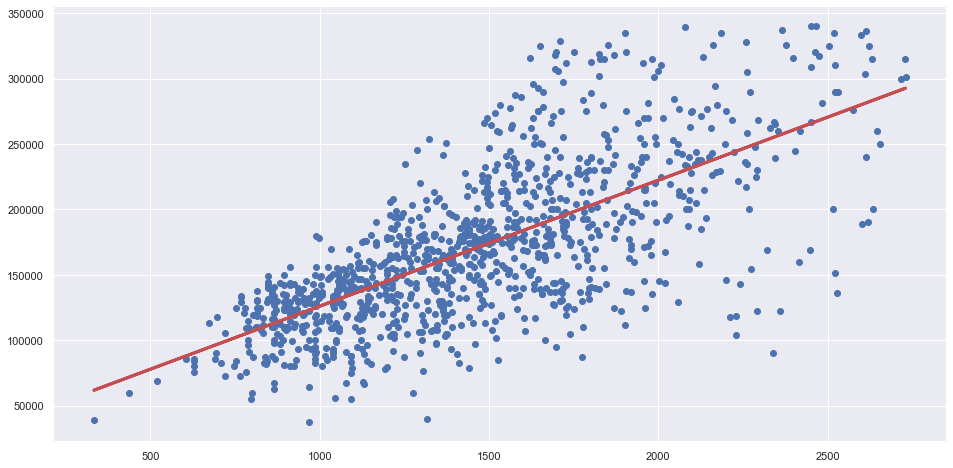

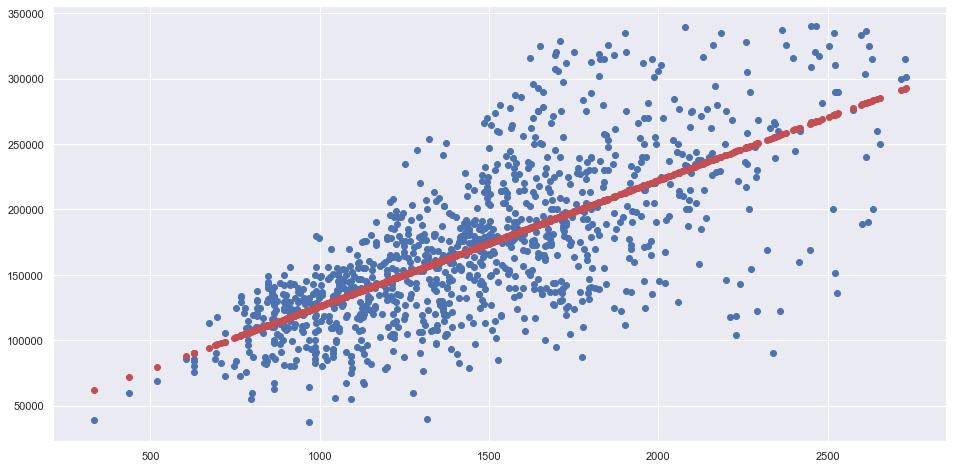

In [74]:
# Recall the SalePrice-GarageArea Dataset
SP = pd.DataFrame(house_data_fil['SalePrice'])   # Response
GA = pd.DataFrame(house_data_fil['GrLivArea'])         # Predictor

# Split the Dataset into Train and Test randomly
X_train, X_test, y_train, y_test = train_test_split(GA, SP, test_size = 0.2)    #200 test, 600 train
# train_test_split(x,y,fraction of elements wanted in test set)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict SalePrice values corresponding to GarageArea
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)


# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred, color = "r")
plt.show()


In [75]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(house_data_fil['GrLivArea'])

# Predict Response corresponding to Predictors
y_pred = linreg.predict(X_pred)
y_pred

array([[82473.5848055 ],
       [73996.82761607],
       [88253.1919801 ],
       ...,
       [53960.85607744],
       [52804.93464252],
       [56272.69894728]])

In [77]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns = ["PredSP"], index = house_data_fil.index)
house_data_fil_acc = pd.concat([house_data_fil[["GrLivArea", "SalePrice"]], y_pred], axis = 1)

y_errs = 100 * abs(house_data_fil_acc["SalePrice"] - house_data_fil_acc["PredSP"]) / house_data_fil_acc["SalePrice"]
y_errs = pd.DataFrame(y_errs, columns = ["Error"], index = house_data_fil.index)
house_data_fil_acc = pd.concat([house_data_fil_acc, y_errs], axis = 1)

house_data_fil_acc

#Error is in percentage

,GrLivArea,SalePrice,PredSP,Error
0,1710,208500,82473.584805,60.444324
1,1262,181500,73996.827616,59.230398
2,1786,223500,88253.191980,60.513113
3,1717,140000,91528.302712,34.622641
4,2198,250000,110215.699244,55.913720
...,...,...,...,...
1455,1647,175000,73996.827616,57.716099
1456,2073,210000,77849.899066,62.928619
1457,2340,266500,53960.856077,79.752024
1458,1078,142125,52804.934643,62.846132


(c) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set.
Do you think this model is better than the model obtained in Problem 1 for the same variables? Briefly justify.

    o Part (c) is the same as Problem 2, but keep in mind that the dataset has changed in this case, not the variables.

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.492484227170772
Mean Squared Error (MSE) 	: 1799774005.8027194
Root Mean Squared Error (RMSE) 	: 42423.743420432846

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.40112041776144025
Mean Squared Error (MSE) 	: 1807336223.9646745
Root Mean Squared Error (RMSE) 	: 42512.777184802624



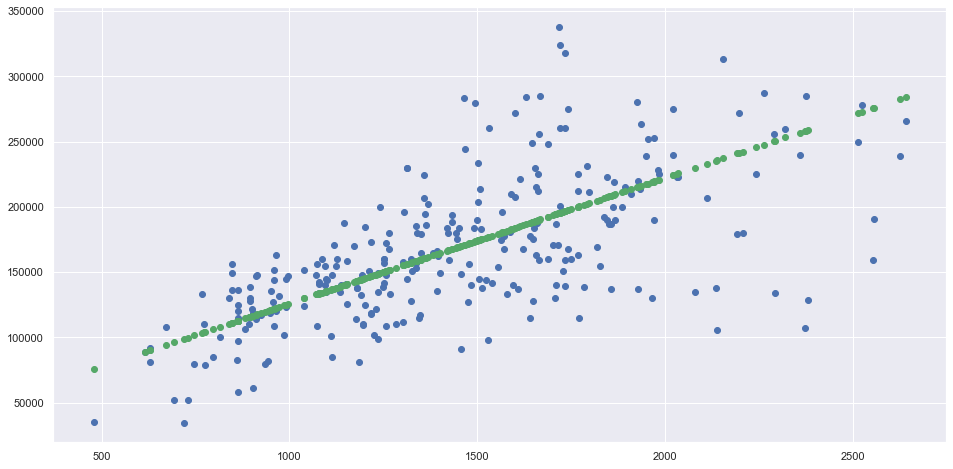

In [78]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
mse1 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse1)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse1))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
mse2 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse2)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse2))
print()

# Plot the Linear Regression line for test dataset
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_pred, color = "g")
plt.show()

### Stats for unfiltered data

The Explained Variance is lower for filtered data but the MSE and RMSE is much lower. Thus the filtered dataset (without outliers) is better.